In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

from matplotlib.pylab import rcParams

# Velocidade Média Mensal do Vento - Série Temporal

BDMEP - INMET<br>
--------------------<br>
Estação           : NATAL - RN (OMM: 82598) <br>
Latitude  (graus) : -5.91<br>
Longitude (graus) : -35.2<br>
Altitude  (metros): 48.60<br>
Estação Operante<br>
Inicio de operação: 01/01/1911<br>
Periodo solicitado dos dados: 01/01/2013 a 01/08/2018<br>
Os dados listados abaixo são os que encontram-se digitados no BDMEP<br>
Hora em UTC<br>
--------------------<br>
Obs.: Os dados aparecem separados por ; (ponto e vírgula) no formato txt.<br>


In [3]:
rcParams['figure.figsize'] = 15, 6

In [4]:
data1 = pd.read_csv("vento_mensal.csv")
data1['Date'] = pd.to_datetime(data1['Date'], format = '%Y-%m-%d')
data1.head()

,Date,VelocidadeVentoMedia
0,2000-01-31,4.084946
1,2000-02-29,3.640230
2,2000-03-31,4.284946
3,2000-04-30,3.707778
4,2000-05-31,4.151613


In [5]:
X1 = np.arange(len(data1))
y1 = pd.Series(data1.VelocidadeVentoMedia.values)

Text(0,0.5,'Wind Speed (mps)')

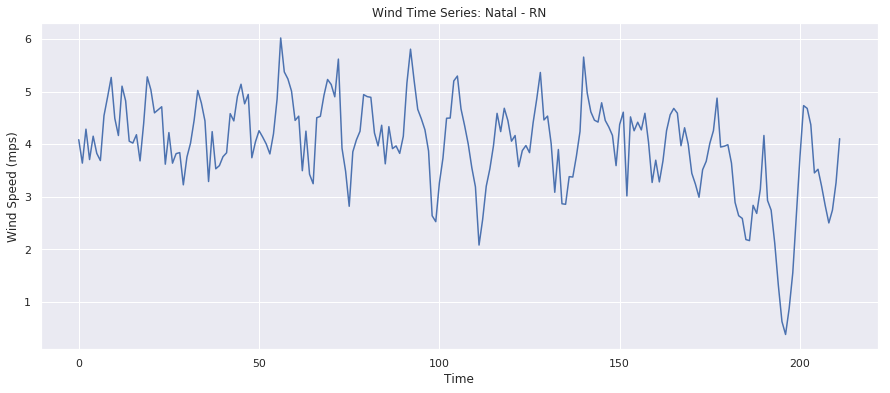

In [6]:
plt.plot(X1, y1)
plt.title('Wind Time Series: Natal - RN')
plt.xlabel('Time')
plt.ylabel('Wind Speed (mps)')

## Caso 1

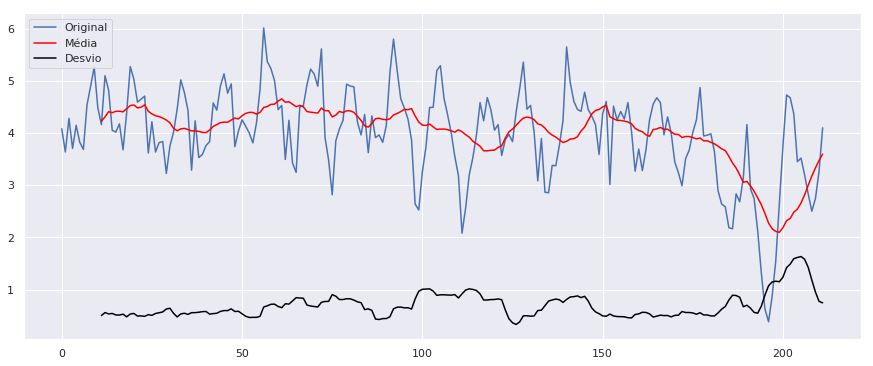

In [7]:
m_m1 = y1.rolling(window=12).mean()
m_std1 = y1.rolling(window=12).std() 

orig1 = plt.plot(y1,label='Original')
mean1 = plt.plot(m_m1, color='red',label='Média')
std1 = plt.plot(m_std1, color='black',label='Desvio')
plt.legend(loc='upper left')
plt.show()

### Estimação de tendência (Médias móveis)

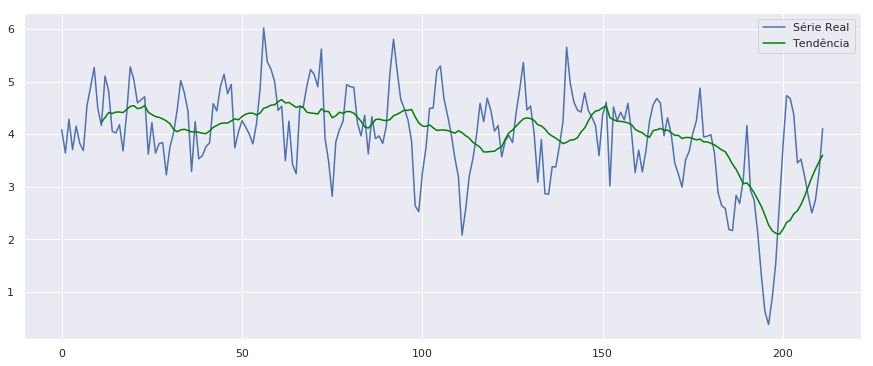

In [8]:
X1 = [i for i in range(0, len(y1))]
X1 = np.reshape(X1, (len(X1), 1))
rolling1 = y1.rolling(window=12)
media_mov1 = rolling1.mean()

tendencia1 = media_mov1

plt.plot(y1, label='Série Real')
plt.plot(tendencia1,color='green', label='Tendência' )
plt.legend(loc='best')
plt.show()

### Eliminação de tendência

In [9]:
serie_sem_tendencia1 = y1 - tendencia1

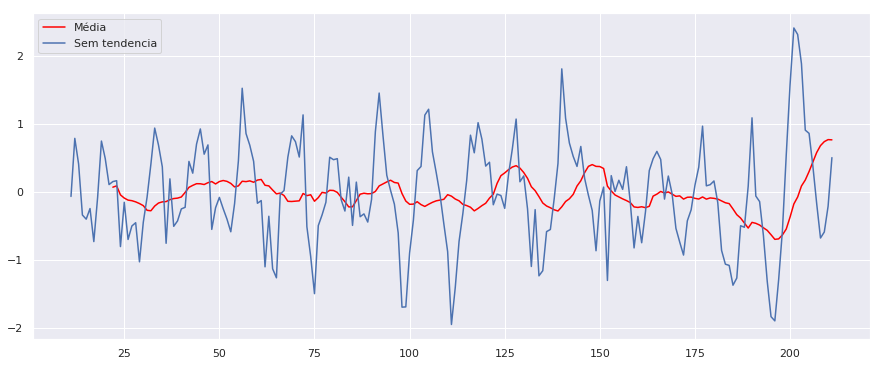

In [10]:
m_m1 = serie_sem_tendencia1.rolling(window=12).mean()
mean1 = plt.plot(m_m1, color='red',label='Média')
plt.plot(serie_sem_tendencia1, label='Sem tendencia')
plt.legend(loc='best')
plt.show()

### Estimação de sazonalidade (Médias móveis)

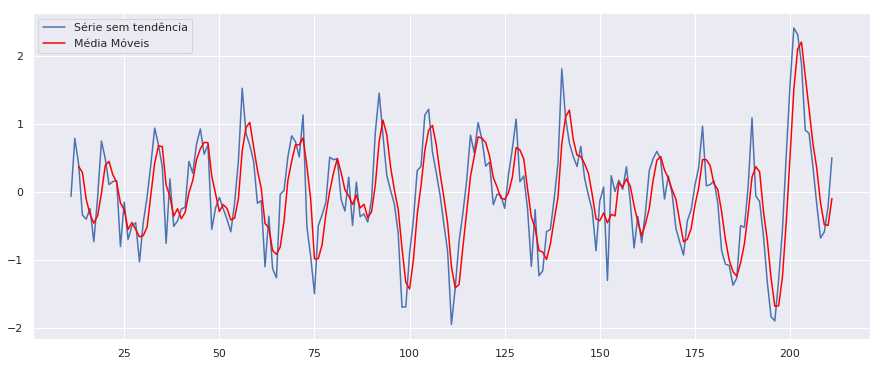

In [11]:
#Aplica média móveis na série sem a tendência 
rolling1 = serie_sem_tendencia1.rolling(window=3)
saz_mean_mov1 = rolling1.mean()
# plot original and transformed dataset
plt.plot(serie_sem_tendencia1, label='Série sem tendência')
plt.plot(saz_mean_mov1,color='red', label='Média Móveis')
plt.legend(loc='best')
plt.show()

### Eliminação de sazonalidade

In [12]:
serie_residuo1 = serie_sem_tendencia1 - saz_mean_mov1 #Elimina o componente de sazonalidade

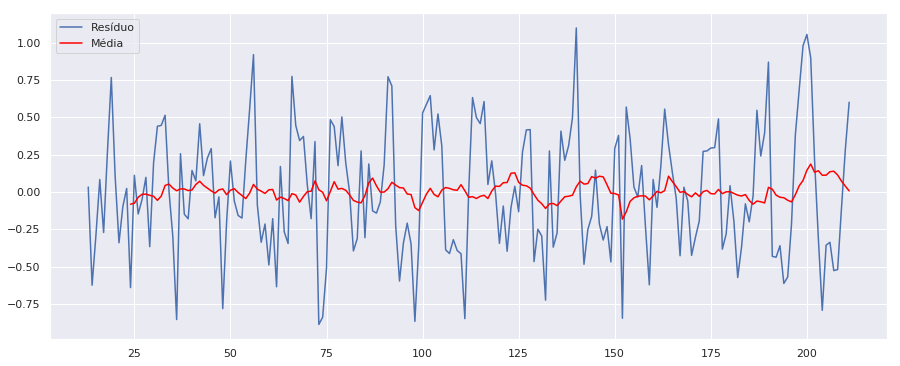

In [13]:
# Case 1
m_m1 = serie_residuo1.rolling(window=12).mean()
plt.plot(serie_residuo1, label='Resíduo')
mean1 = plt.plot(m_m1, color='red',label='Média')
plt.legend(loc='best')
plt.show()

### Ruído

In [14]:
desvio1 = serie_residuo1.var()
random_normal1 = [i for i in np.random.normal(scale=desvio1, size = len(serie_residuo1))]

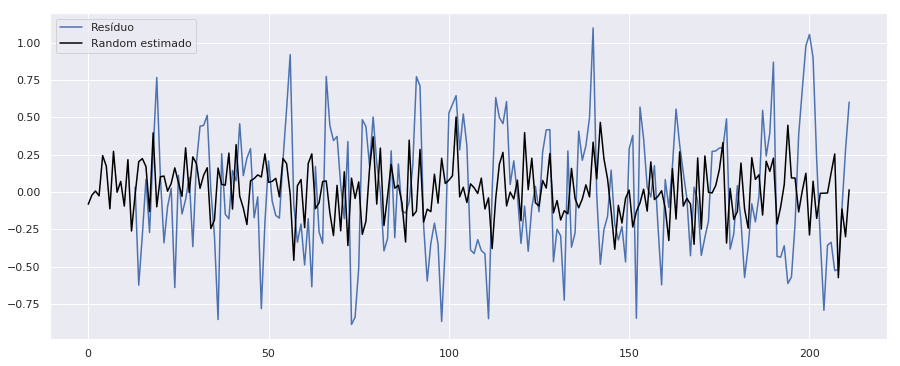

In [15]:
plt.plot(serie_residuo1.values, label='Resíduo')
plt.plot(random_normal1, color='black',label='Random estimado')
plt.legend(loc='best')
plt.show()

## Caso 2

### Estimação de tendência (Suavização exponencial)

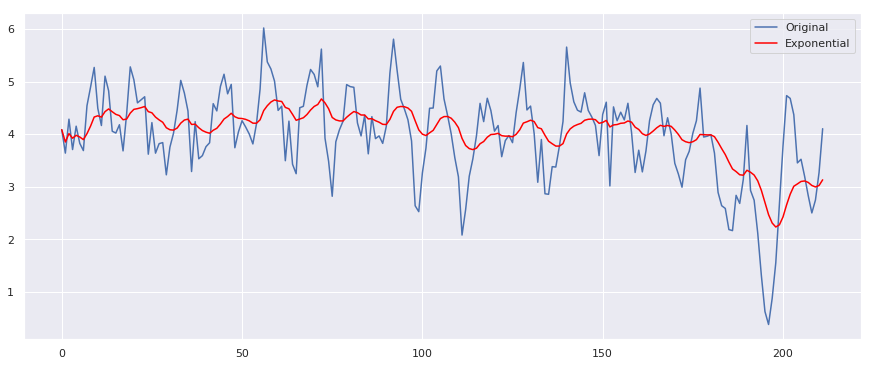

In [16]:
rolling2 =  y1.ewm(alpha =0.1)
suav_exp = rolling2.mean()
plt.plot(y1, label='Original')
plt.plot(suav_exp,color='red', label='Exponential')
plt.legend(loc='best')
plt.show()

### Eliminação de tendência

In [17]:
serie_sem_tendencia = y1 - suav_exp  # Série - componente de tendência

### Estimação de sazonalidade (Médias móveis)

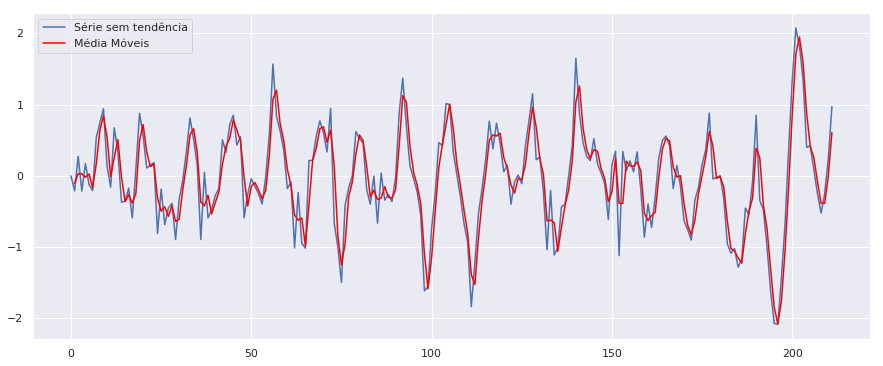

In [18]:
#Aplica média móveis na série sem a tendência 
rolling = serie_sem_tendencia.rolling(window=2)
saz_mean_mov = rolling.mean()
# plot original and transformed dataset
plt.plot(serie_sem_tendencia, label='Série sem tendência')
plt.plot(saz_mean_mov,color='red', label='Média Móveis')
plt.legend(loc='best')
plt.show()

### Eliminação de sazonalidade

In [19]:
serie_residuo = serie_sem_tendencia - saz_mean_mov #Elimina o componente de sazonalidade

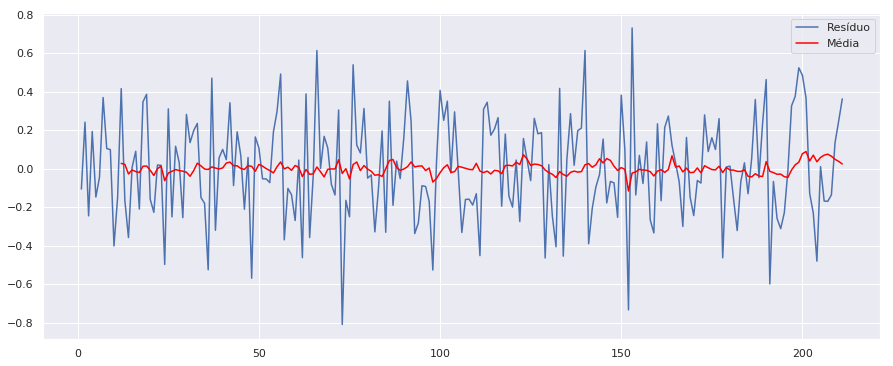

In [20]:
m_m = serie_residuo.rolling(window=12).mean()
plt.plot(serie_residuo, label='Resíduo')
mean = plt.plot(m_m, color='red',label='Média')
plt.legend(loc='best')
plt.show()

### Ruído

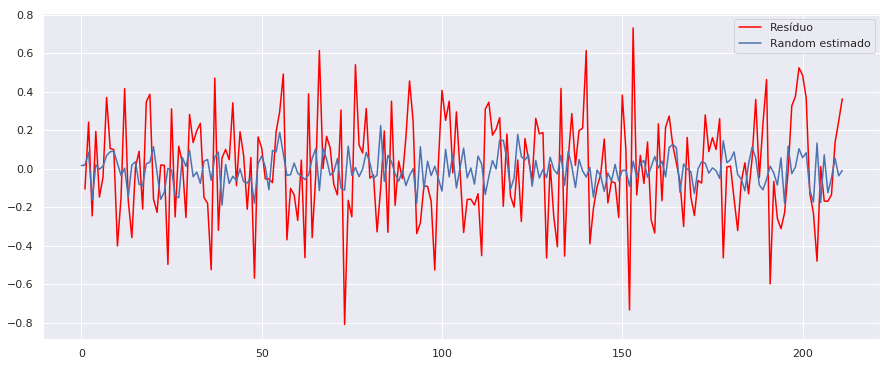

In [21]:
desvio = serie_residuo.var()
random_normal = [i for i in np.random.normal(scale=desvio, size = len(serie_residuo))]

plt.plot(serie_residuo.values, color='red', label='Resíduo')
plt.plot(random_normal,label='Random estimado')
plt.legend(loc='best')
plt.show()

## Caso 3

### Eliminação de tendência (Diferenciação)

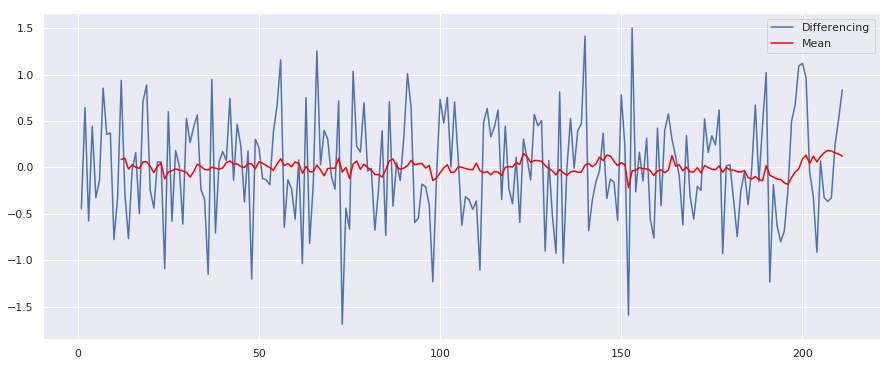

In [22]:
## de forma mais simples
serie_diff_pd = y1 - y1.shift()

m_m = serie_diff_pd.rolling(window=12).mean()
plt.plot(serie_diff_pd, label='Differencing')
mean = plt.plot(m_m, color='red',label='Mean')
plt.legend(loc='best')
plt.show()

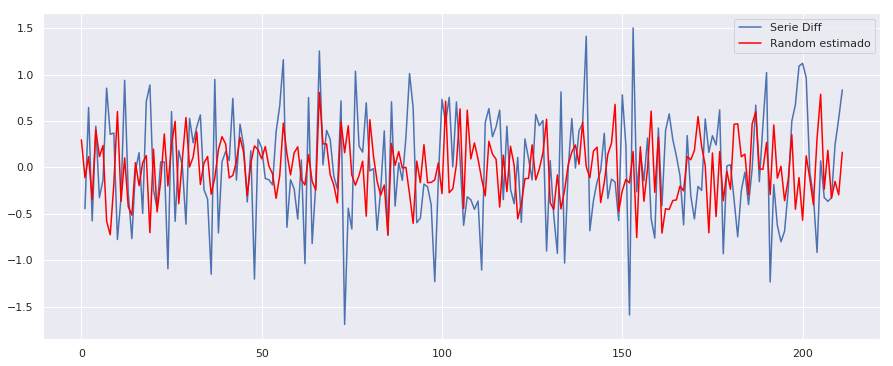

In [23]:
desvio = serie_diff_pd.var()
random_normal = [i for i in np.random.normal(scale=desvio, size = len(serie_diff_pd))]

plt.plot(serie_diff_pd.values, label='Serie Diff')
plt.plot(random_normal, color='red',label='Random estimado')
plt.legend(loc='best')
plt.show()

In [24]:
ruido_1 = serie_residuo1
ruido_2 = serie_residuo
ruido_3 = serie_diff_pd

# Noise Analysis

## Case 1

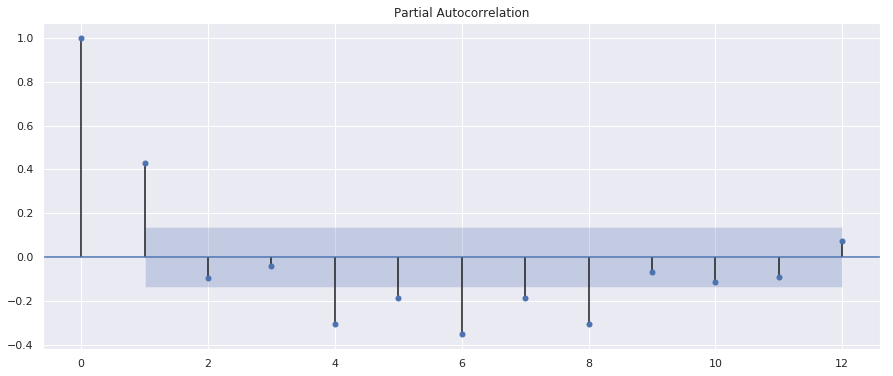

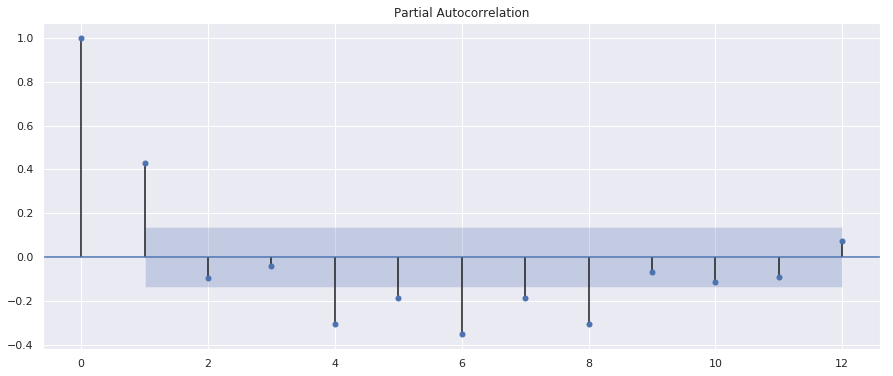

In [25]:
serie_residuo1.dropna(inplace=True)
smt.graphics.plot_pacf(serie_residuo1, lags=12, alpha=0.05)

## Case 2

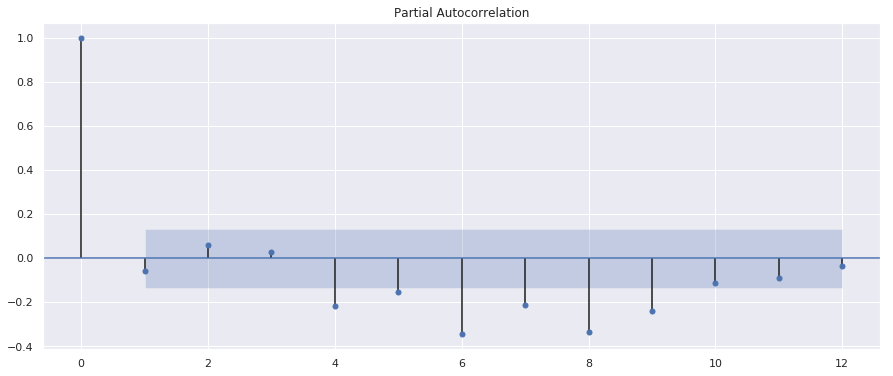

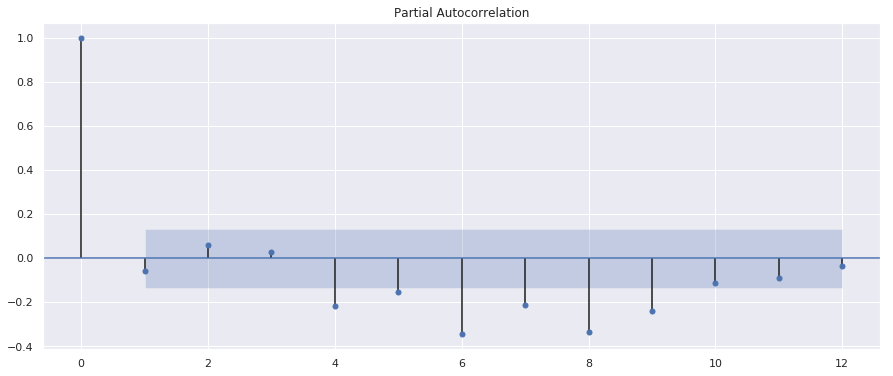

In [26]:
serie_residuo.dropna(inplace=True)
smt.graphics.plot_pacf(serie_residuo, lags=12, alpha=0.05)

## Case 3

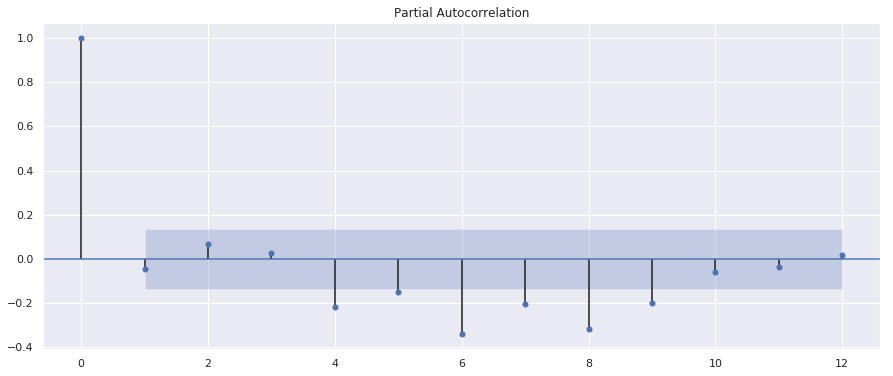

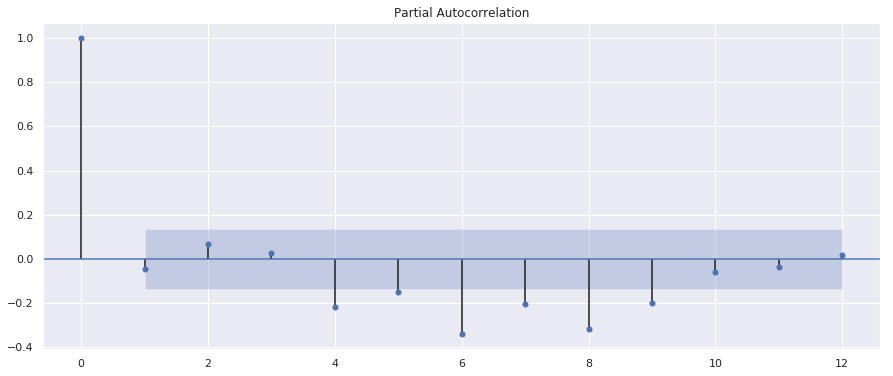

In [27]:
serie_diff_pd.dropna(inplace=True)
smt.graphics.plot_pacf(serie_diff_pd, lags=12, alpha=0.05)

# Série Temporal Financeira

## Dow Jones Industrial Average

O índice Dow Jones Industrial Average (DJIA) é ao lado do Nasdaq Composite e do Standard & Poor’s 500 um dos principais indicadores dos movimentos do mercado financeiro americano. Dos três indicadores, DJIA é o mais largamente publicado e discutido. O cálculo deste índice é bastante simples e é baseado na cotação das ações de 30 das maiores e mais importantes empresas dos Estados Unidos. 

Foram obtidos os dados diários da cotação do índice referentes ao período de 2000 até o ano corrente. Para a análise, foi selecionado o valor de fechamento diário.

Fonte: https://finance.yahoo.com/quote/%5EDJI/history/

In [48]:
financ_data = pd.read_csv('DJI.csv')
financ_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,11501.849609,11522.009766,11305.690430,11357.509766,11357.509766,169750000
1,2000-01-04,11349.750000,11350.059570,10986.450195,10997.929688,10997.929688,178420000
2,2000-01-05,10989.370117,11215.099609,10938.669922,11122.650391,11122.650391,203190000
3,2000-01-06,11113.370117,11313.450195,11098.450195,11253.259766,11253.259766,176550000
4,2000-01-07,11247.059570,11528.139648,11239.919922,11522.559570,11522.559570,184900000


In [29]:
dowjones = pd.Series(financ_data.Close.values)

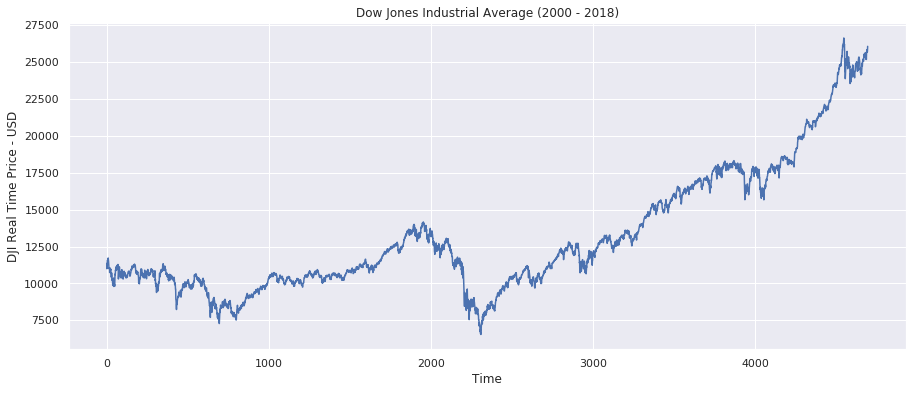

In [30]:
plt.plot(dowjones)
plt.xlabel('Time')
plt.ylabel('DJI Real Time Price - USD')
plt.title('Dow Jones Industrial Average (2000 - 2018)')
plt.show()

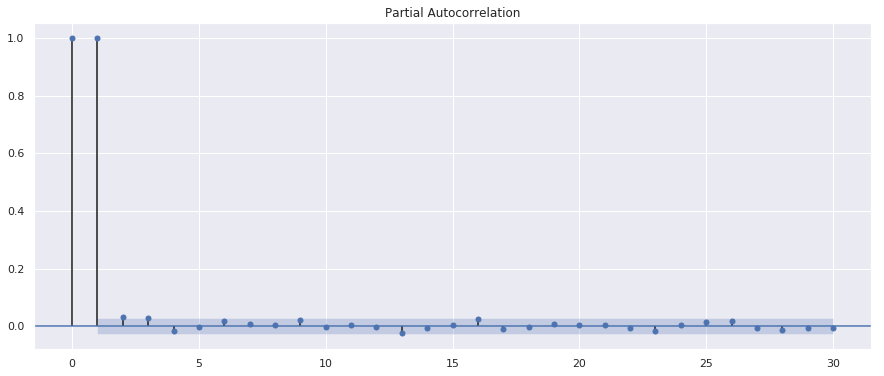

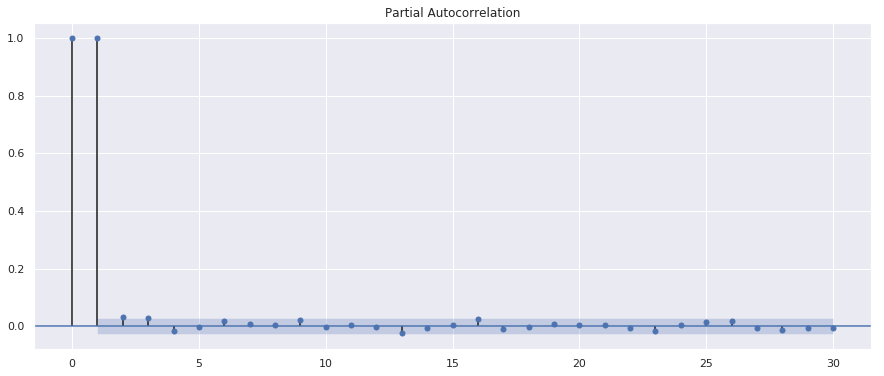

In [44]:
smt.graphics.plot_pacf(dowjones, lags=30, alpha=0.05)

In [32]:
passos = []
for i in range(1, len(dowjones)):
    passo = dowjones[i] - dowjones[i-1]
    passos.append(passo)

In [33]:
media = np.mean(passos)
desvio = np.std(passos)

In [34]:
def prever_randomwalk(valores_anteriores, media, desvio):
    soma = 0
    for i in range(0, len(valores_anteriores)):
        soma = soma + valores_anteriores[i] + np.random.normal(media, desvio, 1)[0]
        
    prev = soma
    return prev

In [35]:
previsoes = []
qtd_lag = 1
x_entrada = dowjones[0:-qtd_lag]
y_saida = dowjones[qtd_lag:]

In [36]:
y_saida.head(5)

1    10997.929688
2    11122.650391
3    11253.259766
4    11522.559570
5    11572.200195
dtype: float64

In [37]:
previsao = []
for i in range(0, len(y_saida)):
    prev = prever_randomwalk([x_entrada.values[i]], media, desvio)
    previsao.append(prev)

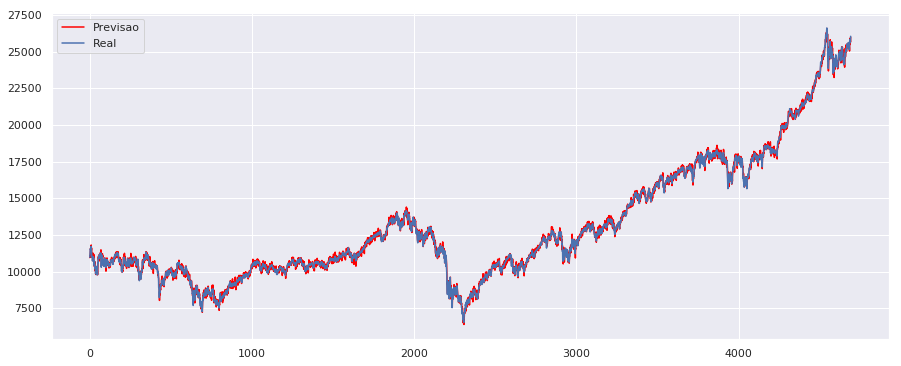

In [38]:
plt.plot(previsao, color='red', label='Previsao')
plt.plot(y_saida.values, label='Real')
plt.legend(loc='best')
plt.show()


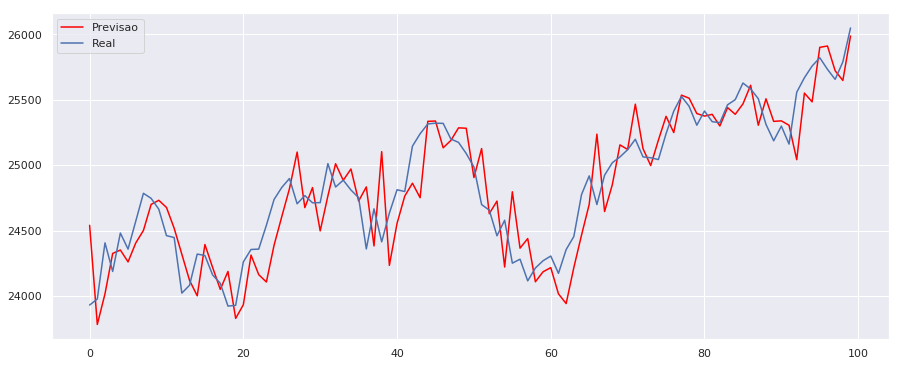

In [39]:
plt.plot(previsao[-100:], color='red', label='Previsao')
plt.plot(y_saida.values[-100:], label='Real')
plt.legend(loc='best')
plt.show()

### Análise do ruído

In [40]:
target = y_saida.values
target = np.reshape(target, (len(target)))

In [41]:
residuo = target- previsao

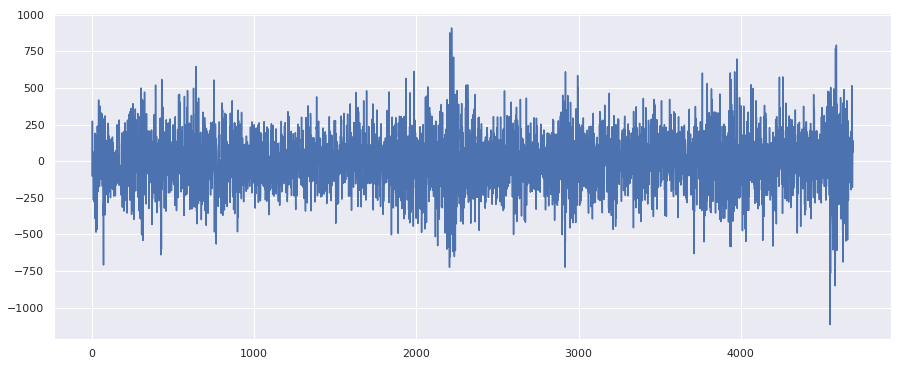

In [42]:
plt.plot(residuo)
plt.show()

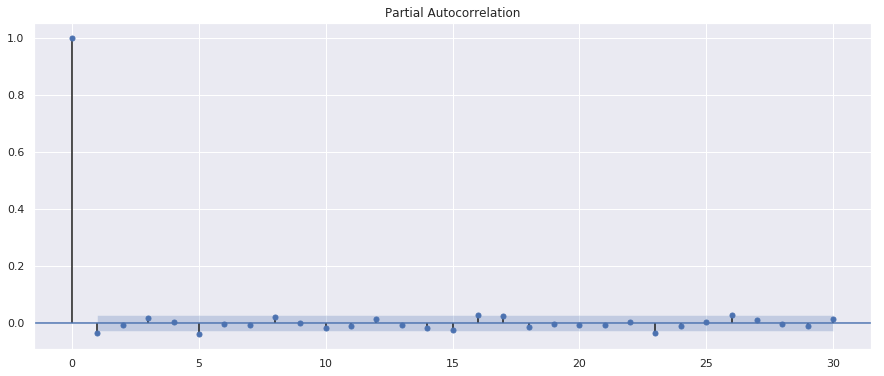

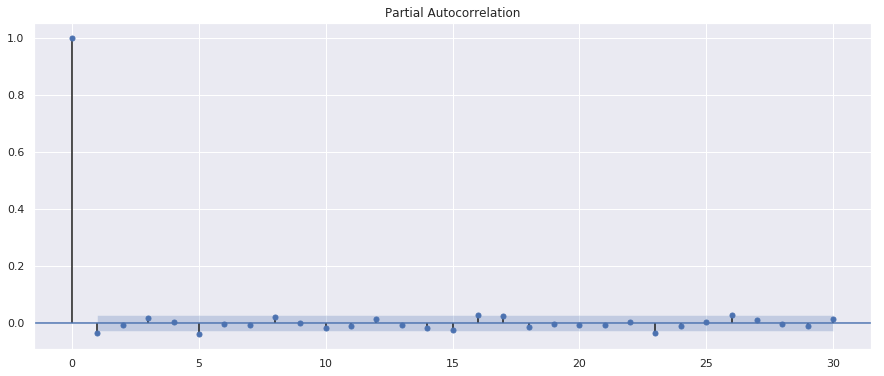

In [45]:
smt.graphics.plot_pacf(residuo, lags=30, alpha=0.05)